In [1]:
%run "00 - Automatic evaluation - DEV.py"

In [2]:
df_all = df_all[
    (df_all.dp_scorer_n.isin([3, 4])) & 
    (df_all.sa_scorer_n.isin([3, 4])) & 
    (df_all.tems_lm_n.isin([3, 4])) & 
    (df_all.referrer_lm_n.isin([3, 4])) & 
    (df_all.txs_lm_n.isin([3, 4])) & 
    (df_all.max_dp.isin([5, 10])) & 
    (df_all.max_sa.isin([5, 10])) & 
    (df_all.max_refs.isin([1, 2])) & 
    (df_all.max_tems.isin([1, 2]))
]

In [3]:
df_all.sort_values(by='bleu', ascending=False)

,bleu,meteor,ter,elapsed_time,dp_scorer_n,sa_scorer_n,tems_lm_n,referrer_lm_n,txs_lm_n,max_dp,max_sa,max_refs,max_tems
6559841226499569924,61.19,0.443667,0.347134,21.258351,4,3,4,3,4,5,5,1,2
-234259948324721883,61.10,0.443707,0.345525,574.396950,4,3,4,3,4,5,5,2,2
2212682235699545222,61.10,0.442870,0.348060,42.336147,4,4,4,3,4,10,5,1,2
584406108735974828,61.09,0.443717,0.346061,668.346418,4,4,4,3,4,5,5,2,2
-8954589047385518825,61.07,0.443103,0.347767,40.825486,4,3,4,3,4,10,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806337142810687958,58.72,0.431977,0.357470,86.172560,3,4,3,4,3,10,5,2,1
443000168887352155,58.71,0.432077,0.357323,81.889787,3,3,3,4,3,10,5,2,1
2185111817602613372,58.70,0.432048,0.358055,85.405318,4,3,3,4,3,10,5,2,1
-5631613902906088320,58.69,0.431742,0.357957,183.348214,4,4,3,4,3,10,10,2,1


In [4]:
df_all.groupby(['max_dp', 'max_sa', 'max_tems', 'max_refs']).bleu.describe(percentiles=[.95]).sort_values('95%', ascending=False)

count       mean       std    min     50%  \
max_dp max_sa max_tems max_refs                                              
5      5      2        1          32.0  60.523438  0.289801  59.91  60.570   
10     5      2        1          32.0  60.466250  0.356694  59.90  60.455   
5      5      2        2          32.0  60.170625  0.557430  59.34  60.040   
       10     2        1          32.0  60.503125  0.286159  59.87  60.485   
                       2          32.0  60.143438  0.534353  59.24  60.090   
10     10     2        1          32.0  60.447500  0.341467  59.91  60.455   
       5      2        2          32.0  59.856875  0.669157  59.06  59.775   
       10     2        2          32.0  59.849688  0.685812  58.97  59.760   
5      10     1        2          32.0  59.878125  0.608379  58.94  59.950   
       5      1        2          32.0  59.865625  0.600473  58.93  59.925   
       10     1        1          32.0  59.978125  0.502718  58.88  60.045   
       5      1        1          32.0  59.934062  0.515951  58.87  59.990   
10     10     1        2          32.0  59.616250  0.634974  58.65  59.745   
       5      1        2          32.0  59.651875  0.640229  58.70  59.740   
                       1          32.0  59.844688  0.453104  59.03  59.885   
       10     1        1          32.0  59.810625  0.422397  59.05  59.870   

                                     95%    max  
max_dp max_sa max_tems max_refs                  
5      5      2        1         61.0490  61.19  
10     5      2        1         60.9765  61.10  
5      5      2        2         60.9745  61.10  
       10     2        1         60.9575  61.06  
                       2         60.9130  61.01  
10     10     2        1         60.9115  61.02  
       5      2        2         60.8160  60.99  
       10     2        2         60.8070  60.99  
5      10     1        2         60.7745  60.91  
       5      1        2         60.7535  60.89  
       10     1        1         60.7275  60.93  
       5      1        1         60.7085  60.94  
10     10     1        2         60.5530  60.64  
       5      1        2         60.5495  60.69  
                       1         60.5380  60.70  
       10     1        1         60.5145  60.52

In [5]:
df_all.groupby(['dp_scorer_n', 'sa_scorer_n', 'tems_lm_n', 'referrer_lm_n', 'txs_lm_n']).bleu.describe(percentiles=[.95]).sort_values('95%', ascending=False)

count       mean  \
dp_scorer_n sa_scorer_n tems_lm_n referrer_lm_n txs_lm_n                     
4           3           4         3             4          16.0  60.896250   
            4           4         3             4          16.0  60.897500   
                        3         3             4          16.0  60.451875   
3           3           4         3             4          16.0  60.656250   
4           4           4         4             4          16.0  60.546875   
            3           3         3             4          16.0  60.465000   
                        4         4             4          16.0  60.519375   
3           4           4         3             4          16.0  60.630000   
                                  4             4          16.0  60.381875   
            3           4         4             4          16.0  60.365625   
4           3           4         4             3          16.0  59.761875   
            4           4         4             3          16.0  59.796250   
            3           3         4             4          16.0  60.174375   
            4           3         4             4          16.0  60.193750   
                        4         3             3          16.0  60.019375   
            3           4         3             3          16.0  60.006875   
3           3           3         4             4          16.0  60.075000   
            4           3         4             4          16.0  60.069375   
            3           3         3             4          16.0  60.193750   
            4           4         3             3          16.0  59.950000   
            3           4         3             3          16.0  59.973125   
            4           3         3             4          16.0  60.159375   
4           4           3         3             3          16.0  59.587500   
            3           3         3             3          16.0  59.581875   
3           3           4         4             3          16.0  59.580625   
            4           4         4             3          16.0  59.565625   
4           3           3         4             3          16.0  59.487500   
            4           3         4             3          16.0  59.502500   
3           4           3         3             3          16.0  59.451250   
            3           3         3             3          16.0  59.474375   
                                  4             3          16.0  59.339375   
            4           3         4             3          16.0  59.326250   

                                                               std    min  \
dp_scorer_n sa_scorer_n tems_lm_n referrer_lm_n txs_lm_n                    
4           3           4         3             4         0.205033  60.52   
            4           4         3             4         0.172530  60.52   
                        3         3             4         0.318668  59.89   
3           3           4         3             4         0.148003  60.46   
4           4           4         4             4         0.229774  60.22   
            3           3         3             4         0.348387  59.84   
                        4         4             4         0.255016  60.14   
3           4           4         3             4         0.142642  60.43   
                                  4             4         0.251243  60.01   
            3           4         4             4         0.263007  60.02   
4           3           4         4             3         0.597352  58.97   
            4           4         4             3         0.588601  59.00   
            3           3         4             4         0.395440  59.57   
            4           3         4             4         0.372163  59.60   
                        4         3             3         0.457362  59.18   
            3           4         3             3         0.431458  59.19   
3           3      

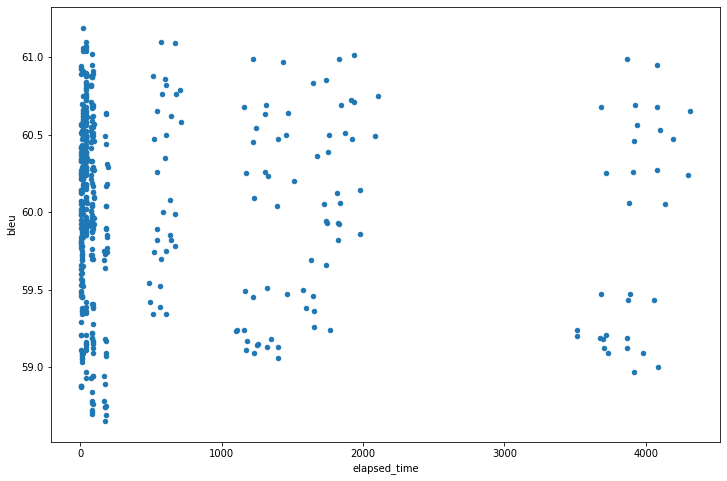

In [6]:
df_all.plot(kind='scatter', y='bleu', x='elapsed_time', figsize=(12, 8))